# 최적의 파라미터 찾기 -> SVM

- c: 비용(cost), 결정 경계선의 마진을 결정하는 파라미터 
- gamma : 커널의 데이터 포인트의 표준편차를 결정하는 파라미터 -> 너무 잘주면 오버 피팅이 된다. 

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 머신러닝 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np 

In [10]:
import pickle
# 데이터 불러오기 
path = './output/basketball_train.pkl'
with open( path , 'rb') as train_data:
    train = pickle.load(train_data)
    
path = './output/basketball_test.pkl'
with open( path , 'rb') as test_data:
    test = pickle.load(test_data)

In [13]:
# 함수 

def svc_param_selection( X, y, nfolds ):
    svm_paramerters = [
                    {'kernel':['rbf'],
                     'gamma' :[0.00001, 0.0001, 0.001, 0.1,1],
                     'C'     :[0.01, 0.1, 1, 10, 100, 1000]
                    }
                        ]
    clf = GridSearchCV( SVC(), svm_paramerters, cv=10 )
    clf.fit( X, y.values.ravel() )
    print( clf.best_params_ )
    
    return clf 

In [14]:
X_train = train[['3P','BLK']]
y_train = train[['Pos']]

clf = svc_param_selection( X_train , y_train, 10 )

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [15]:
# 결과 시각화 - C
C_canditates = []
C_canditates.append(clf.best_params_['C']*0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C']*100)

In [16]:
# 결과 시각화 - gamma 
gamma_canditates = []
gamma_canditates.append(clf.best_params_['gamma']*0.01)
gamma_canditates.append(clf.best_params_['gamma'])
gamma_canditates.append(clf.best_params_['gamma']*100)

In [17]:
X = train[['3P','BLK']]
y = train['Pos'].tolist()

In [19]:
position = [] 

for gt in y: 
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

In [20]:
classifiers = []

for C in C_canditates:
    for gamma in gamma_canditates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X,y)
        classifiers.append((C, gamma, clf))

In [ ]:
SVC.decision_function

In [28]:
plt.figure(figsize=(20,20))

xx, yy = np.meshgrid(np.linspace(0,4,100), np. linspace(0, 4, 100))

<Figure size 1440x1440 with 0 Axes>

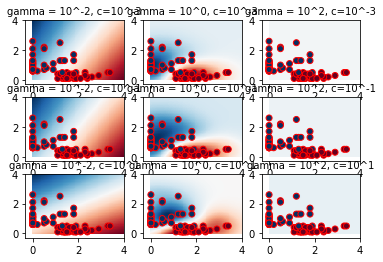

In [29]:
for (k, (C, gamma, clf)) in enumerate(classifiers):
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.subplot(len(C_canditates), len(gamma_canditates), k+1)
    plt.title("gamma = 10^%d, c=10^%d" % (np.log10(gamma), np.log10(C)), size='medium')
    plt.pcolormesh(xx, yy, -z , cmap= plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='r')